# Medical insurance stats

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from patsy import dmatrices
import matplotlib.pyplot as plt

In [3]:
# Load csv file 
df = pd.read_csv('../datasets/insurance.csv', index_col=False)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [4]:
# create a fitted model in one line
lm = smf.ols(formula='charges ~ age', data=df).fit()

# print the coefficients
lm.params

Intercept    3165.885006
age           257.722619
dtype: float64

In [18]:
3165.885006+257.722619*500

132027.194506

In [19]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'age': [500]})
X_new.head()

,age
0,500


In [20]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    132027.19434
dtype: float64

In [21]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'age': [df.age.min(), df.age.max()]})
X_new.head()

,age
0,18
1,64


In [22]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7804.892142
1    19660.132601
dtype: float64

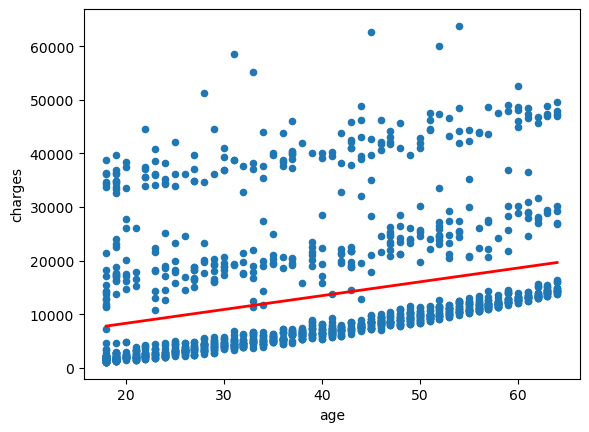

In [24]:
# first, plot the observed data
df.plot(kind='scatter', x='age', y='charges')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
     

In [25]:
lm.conf_int()

,0,1
Intercept,1327.440272,5004.329740
age,213.578754,301.866483
